In [98]:
#https://www.kaggle.com/sharmasanthosh/exploratory-study-on-ml-algorithms
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
train=pd.read_csv('train.csv.zip')
test=pd.read_csv('test.csv.zip')

In [20]:
test_id=test['id']
#remove unnecessary columns
test.drop('id',axis=1,inplace=True)

In [21]:
train.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [22]:
train.shape

(188318, 132)

In [23]:
#drop id since it is not useful
train.drop('id',axis=1,inplace=True)

In [24]:
train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [25]:
train.skew()

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

In [27]:
split=116
train_conti=train.iloc[:,split:]

In [40]:
plt.rcParams.update({'figure.max_open_warning': 100})

In [75]:
cols=train_conti.columns

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss'],
      dtype='object')

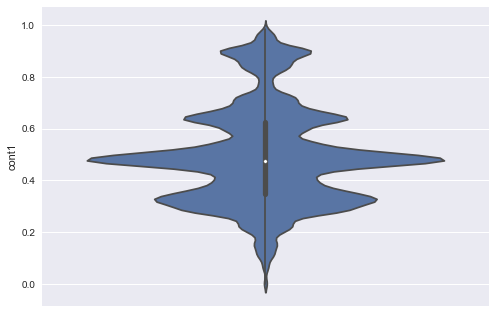

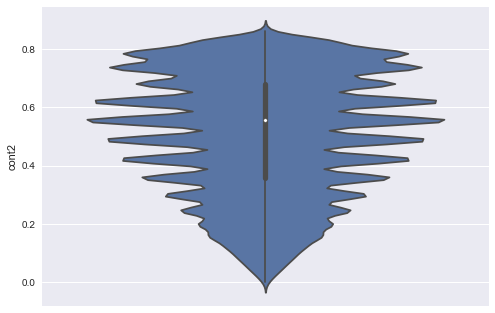

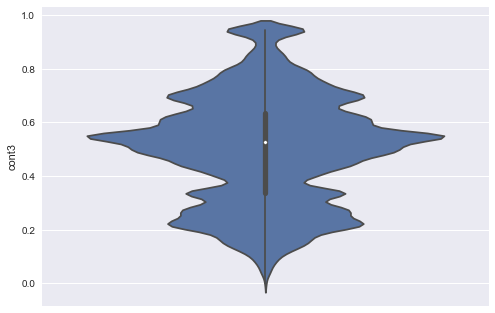

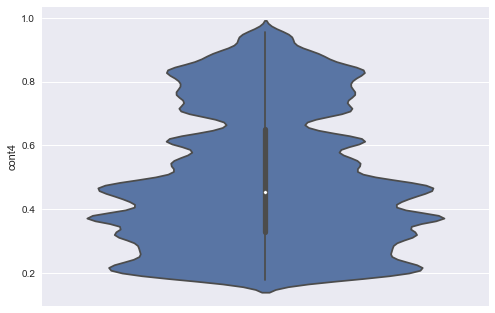

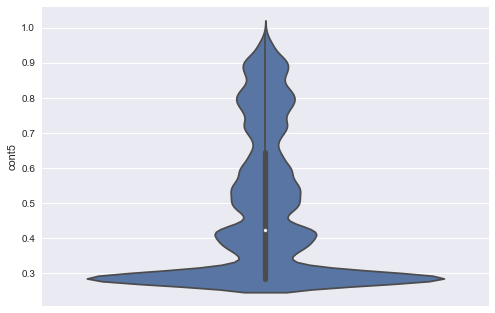

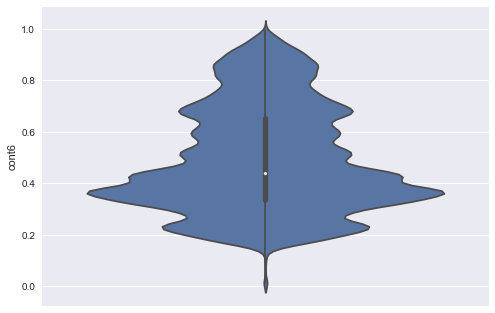

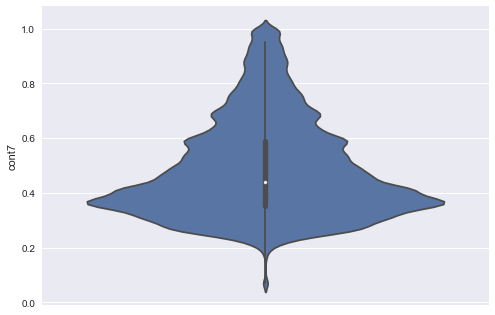

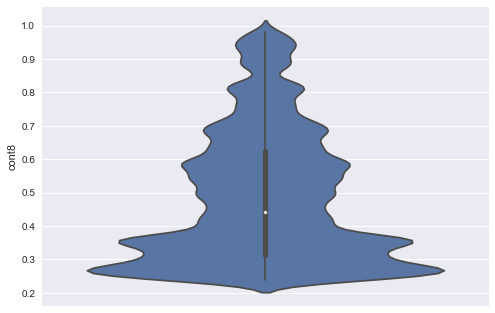

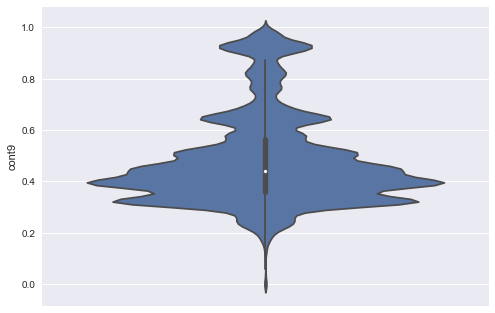

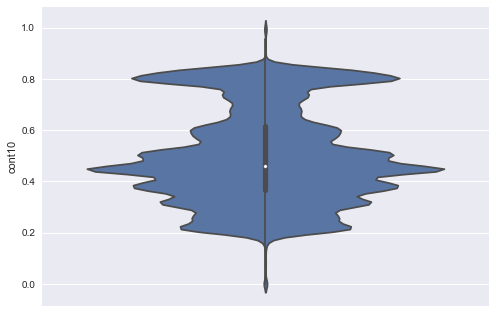

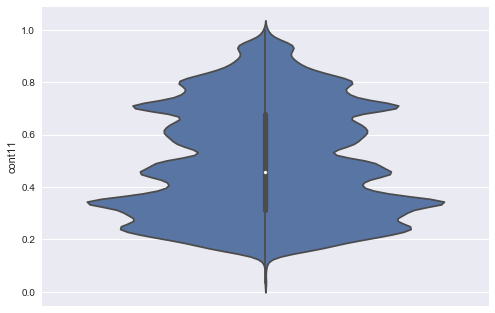

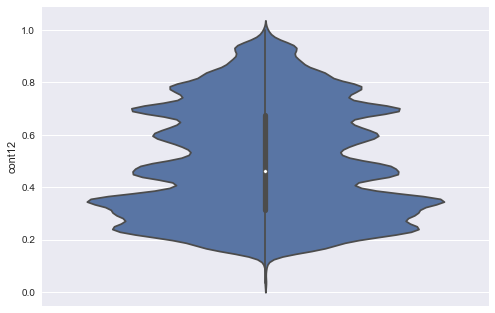

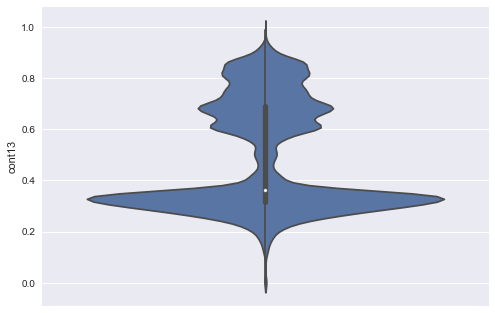

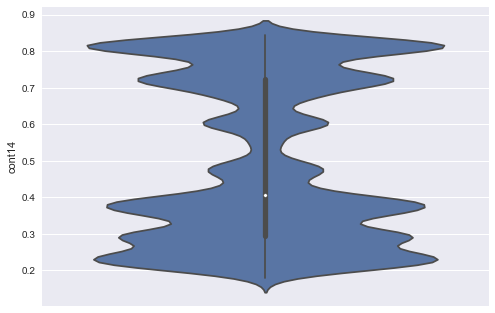

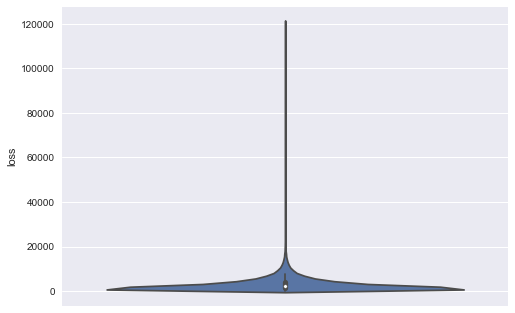

In [96]:

#plot violin for all variables
for i in range(15):
    fig,ax=plt.subplots(nrows=1,ncols=ncol)
    sns.violinplot(y=cols[i], data=train_conti)
plt.show()


In [100]:
#Data Transformation
#Skew correction
train_conti['log_loss']=np.log1p(train_conti['loss'])

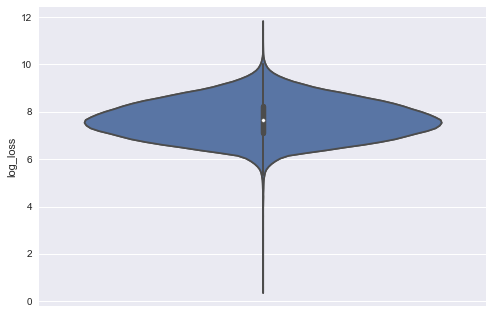

In [102]:
sns.violinplot(data=train_conti,y='log_loss')
plt.show()

In [122]:
#Data Interaction
#correlation

data_corr=train_conti.corr()
corr_list=[]
#No of features we are considering 
size=15
threshold=.5

for i in range(0,size):
    for j in range (i+1,size):
        if(data_corr.iloc[i,j]>threshold and data_corr.iloc[i,j]<1) or \
        (data_corr.iloc[i,j]<0 and data_corr.iloc[i,j]<-threshold):
            corr_list.append((data_corr.iloc[i,j],i,j))

In [141]:
s_corr_list=sorted(corr_list,key=lambda x:-abs(x[0]))

In [146]:
for c,i,j in s_corr_list:
    print("%s and %s are %.2f correlated" %(cols[i],cols[j],c))

cont11 and cont12 are 0.99 correlated
cont1 and cont9 are 0.93 correlated
cont6 and cont10 are 0.88 correlated
cont6 and cont13 are 0.82 correlated
cont1 and cont10 are 0.81 correlated
cont6 and cont9 are 0.80 correlated
cont9 and cont10 are 0.79 correlated
cont6 and cont12 are 0.79 correlated
cont6 and cont11 are 0.77 correlated
cont1 and cont6 are 0.76 correlated
cont7 and cont11 are 0.75 correlated
cont7 and cont12 are 0.74 correlated
cont10 and cont12 are 0.71 correlated
cont10 and cont13 are 0.71 correlated
cont10 and cont11 are 0.70 correlated
cont6 and cont7 are 0.66 correlated
cont9 and cont13 are 0.64 correlated
cont9 and cont12 are 0.63 correlated
cont1 and cont12 are 0.61 correlated
cont9 and cont11 are 0.61 correlated
cont1 and cont11 are 0.60 correlated
cont1 and cont13 are 0.53 correlated
cont4 and cont8 are 0.53 correlated


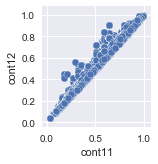

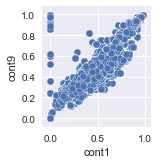

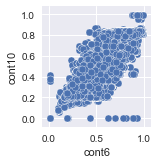

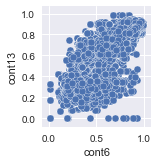

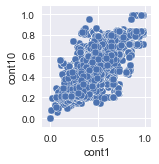

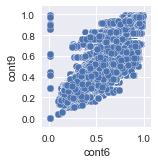

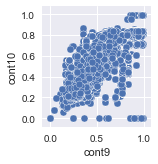

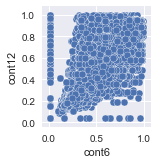

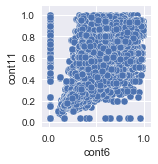

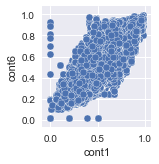

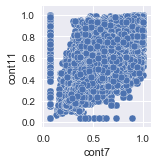

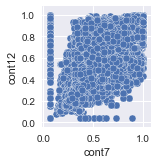

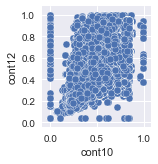

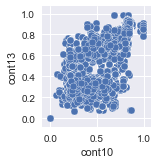

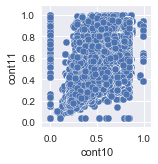

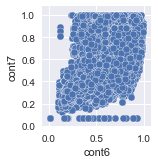

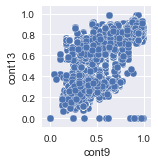

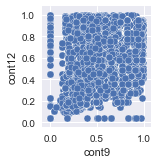

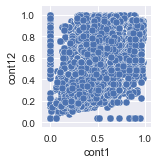

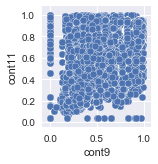

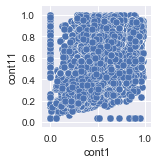

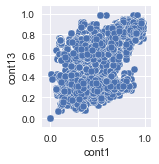

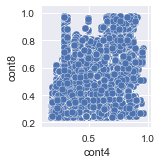

In [150]:
for v,i,j in s_corr_list:
    sns.pairplot(train_conti,x_vars=cols[i],y_vars=cols[j])
plt.show()

In [151]:
#Data Visualization
cols=train.columns
cols

Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
       'cat10',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=131)

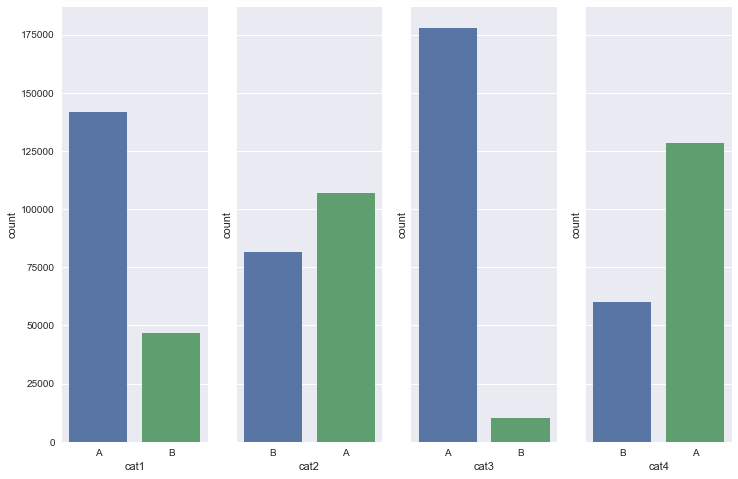

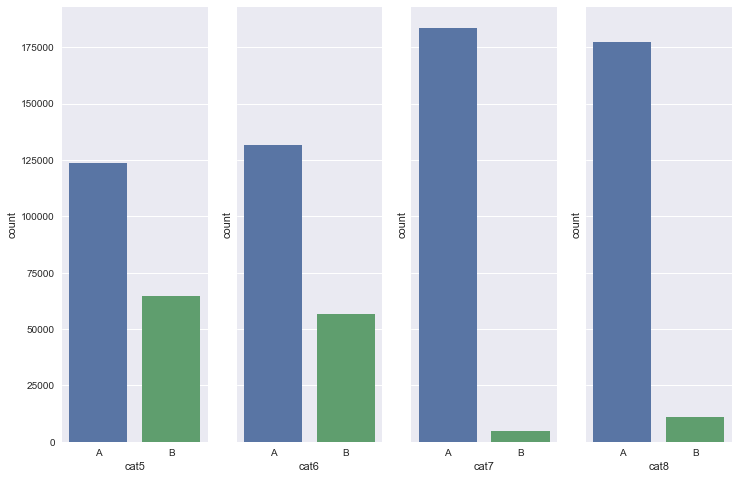

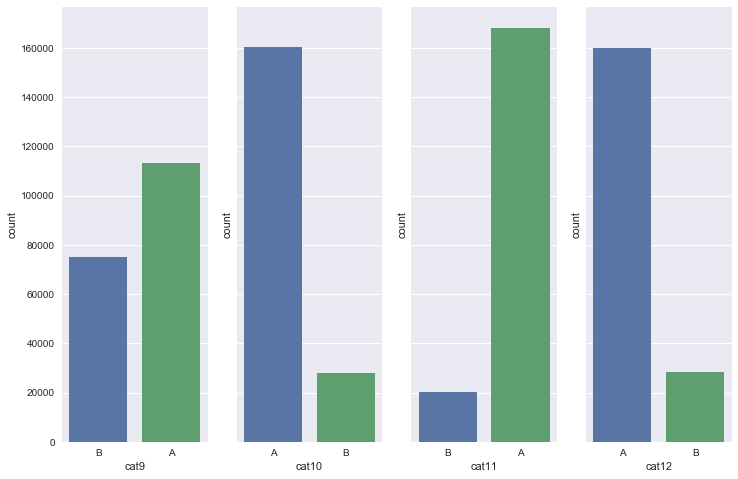

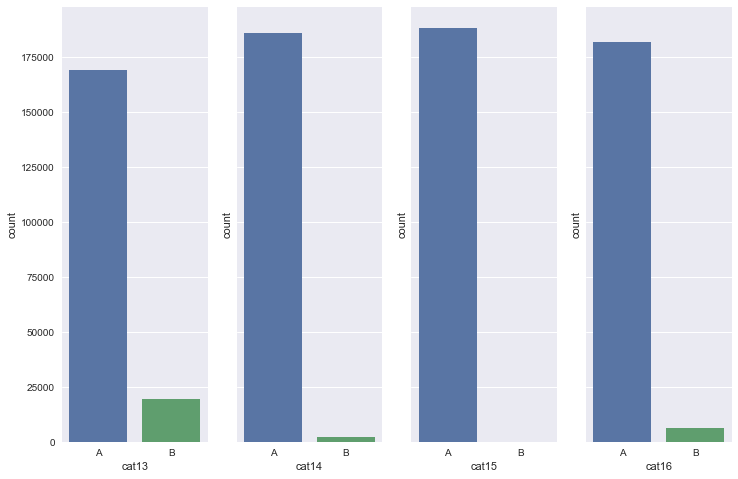

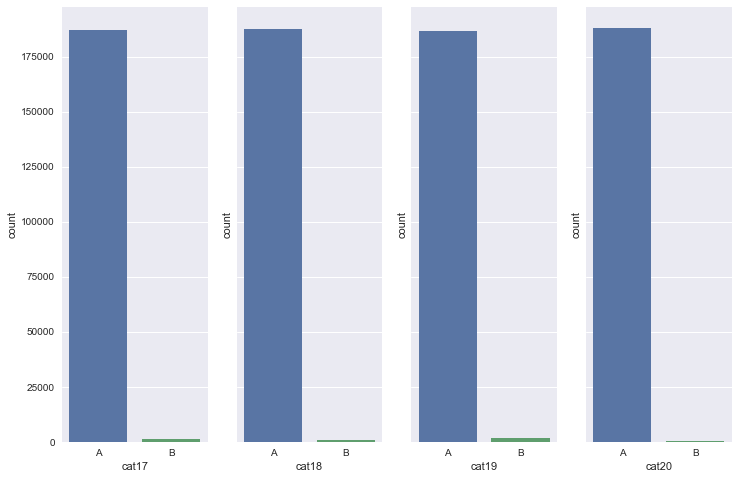

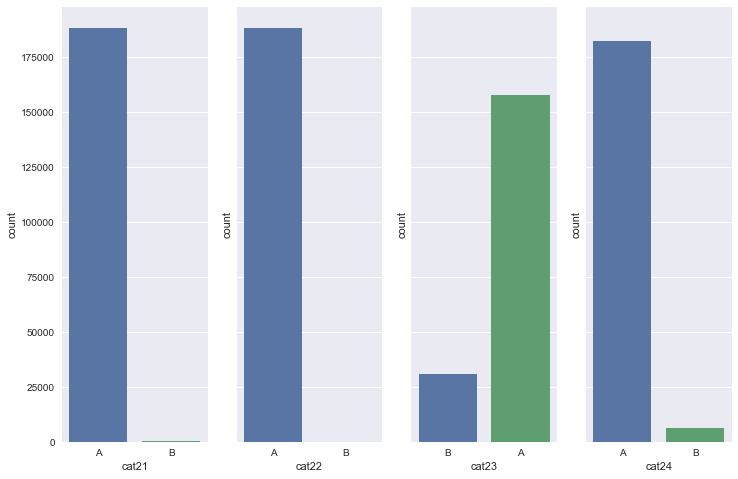

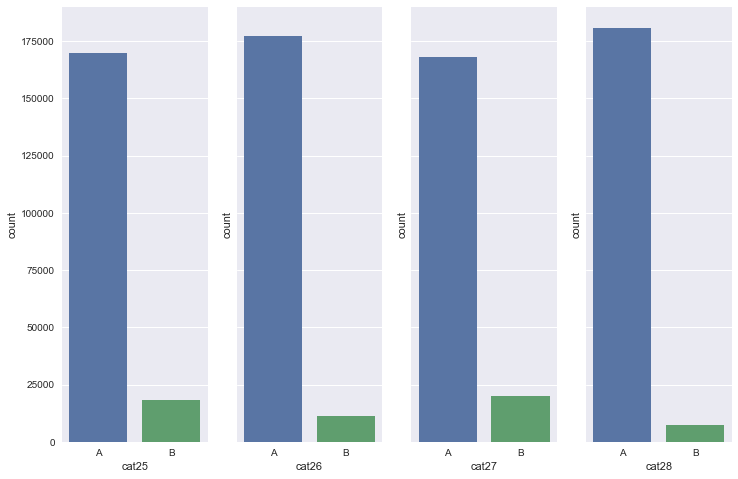

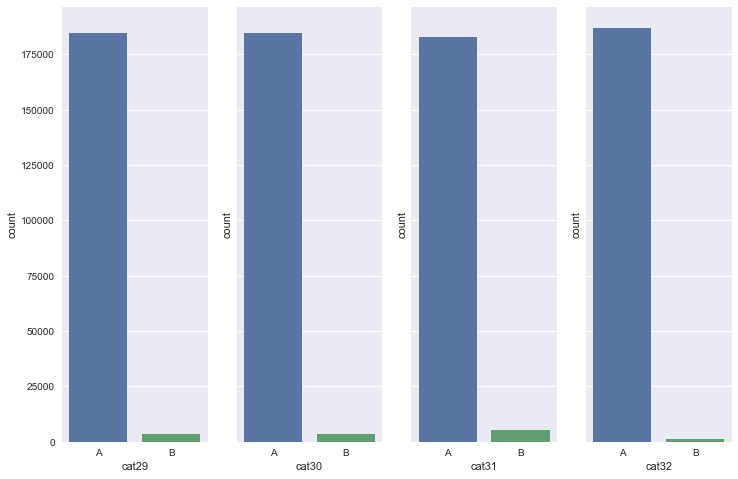

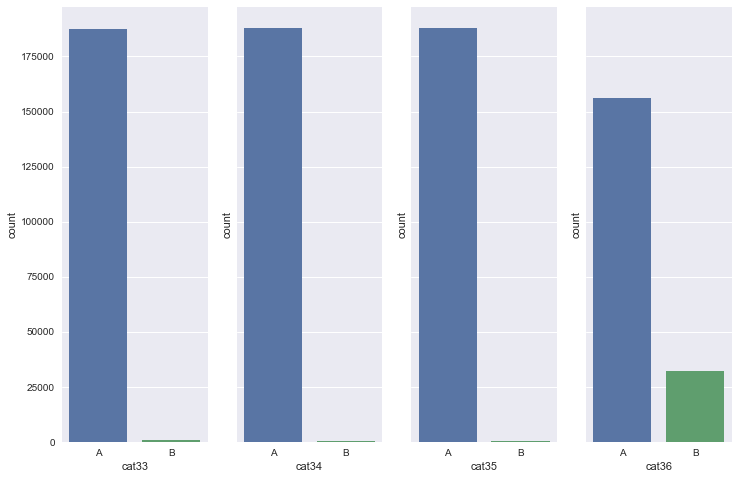

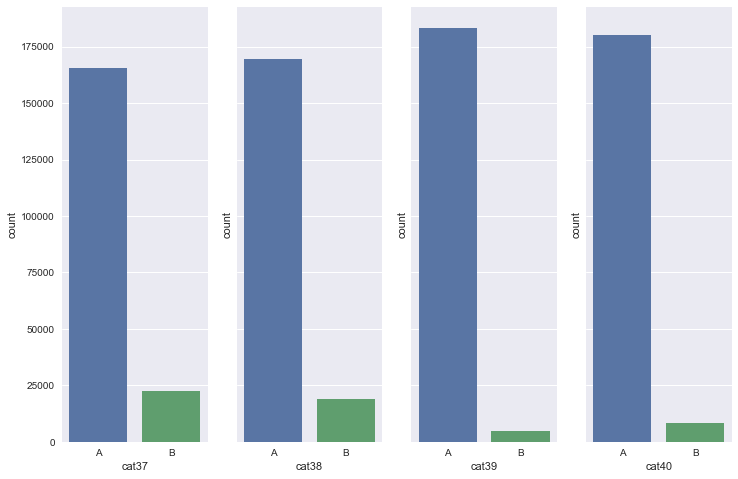

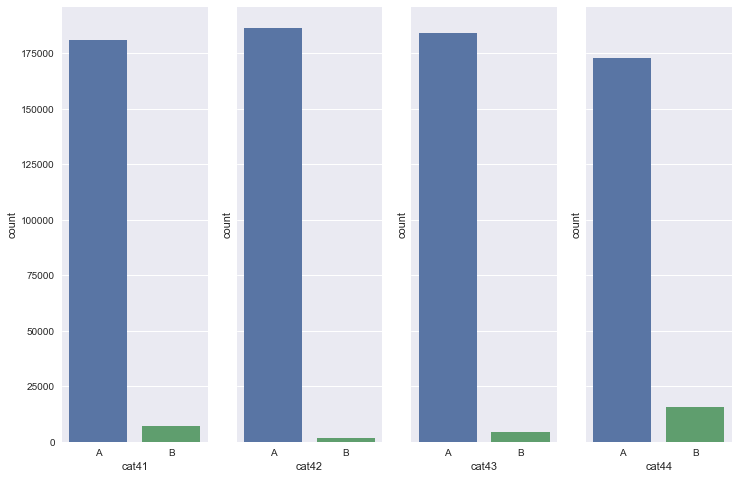

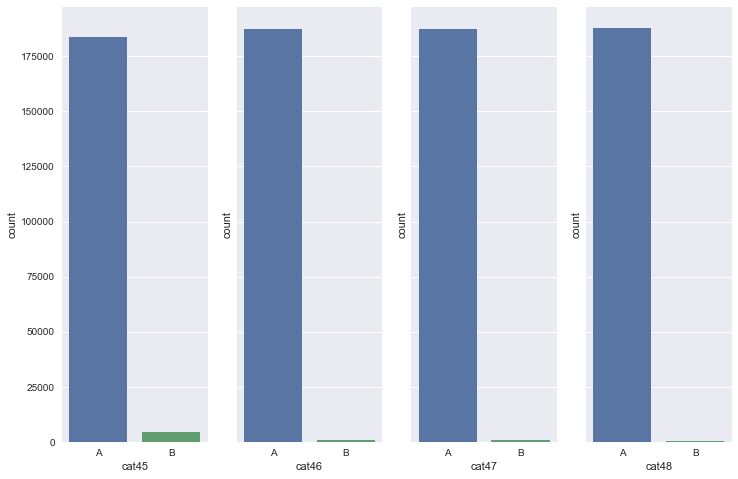

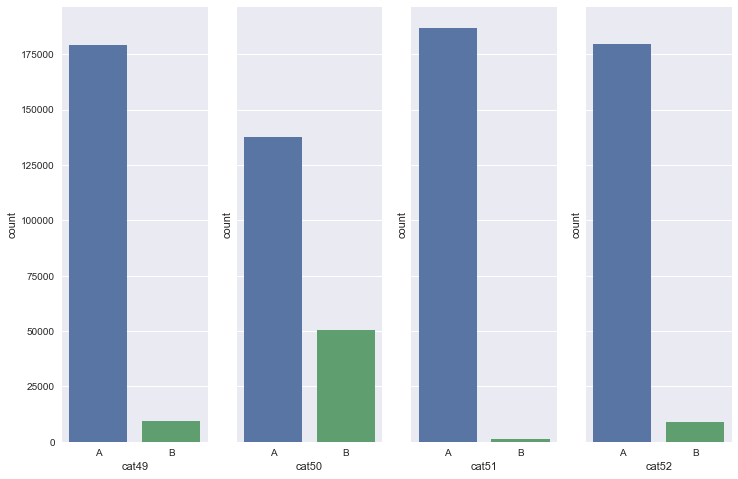

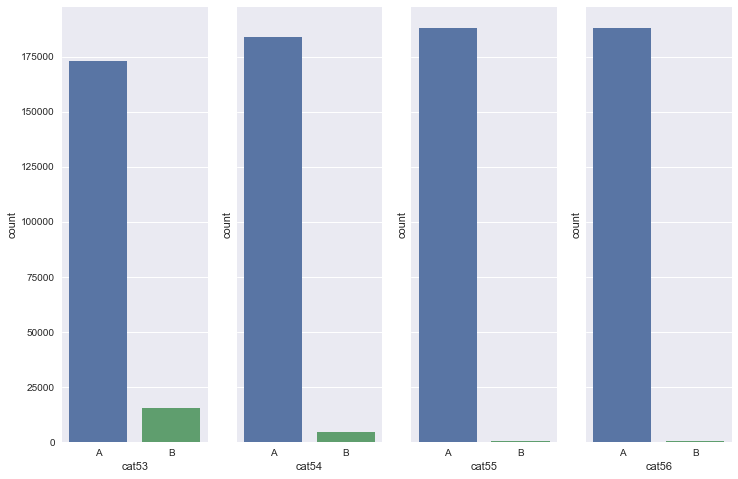

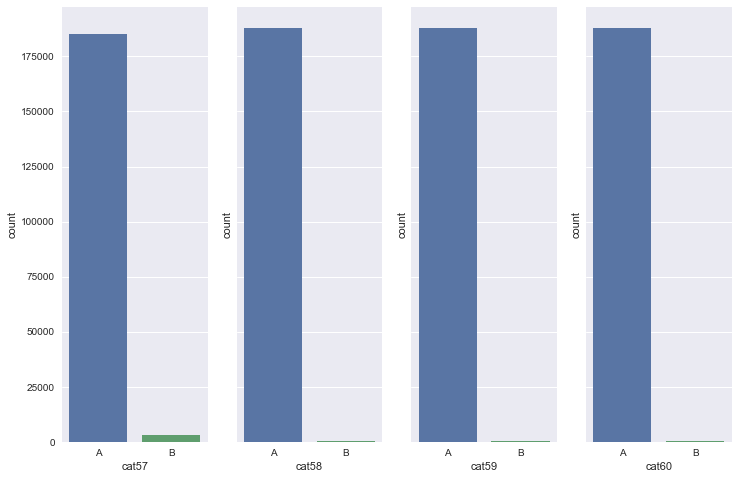

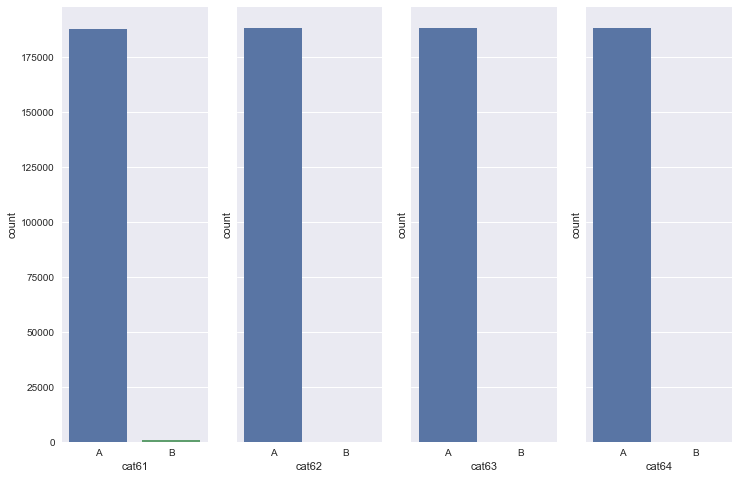

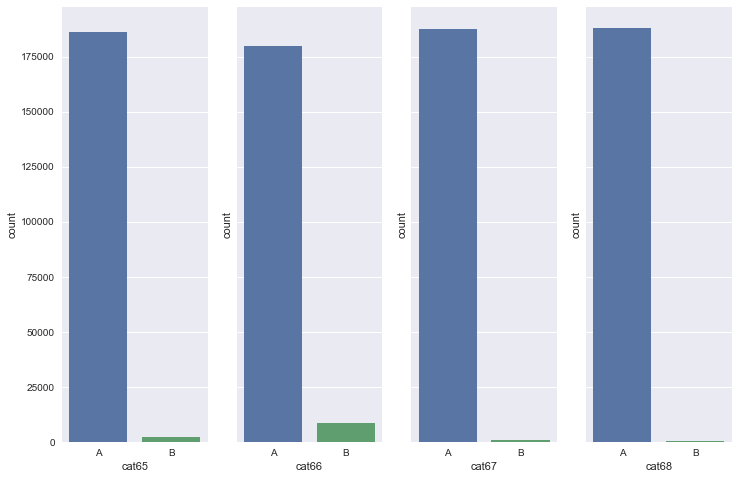

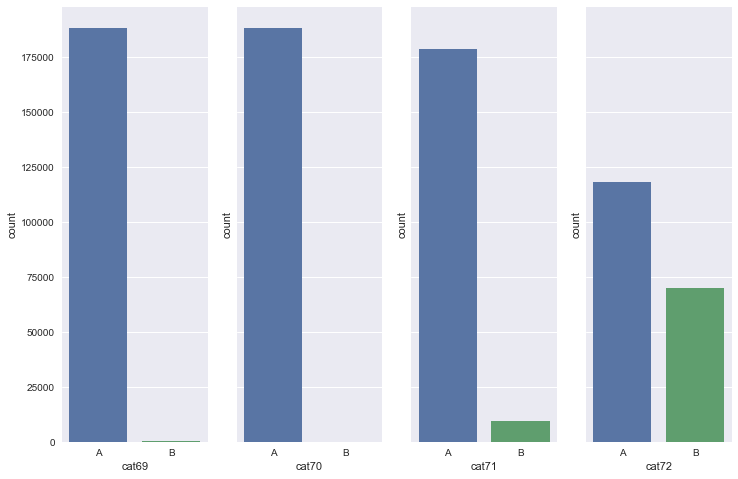

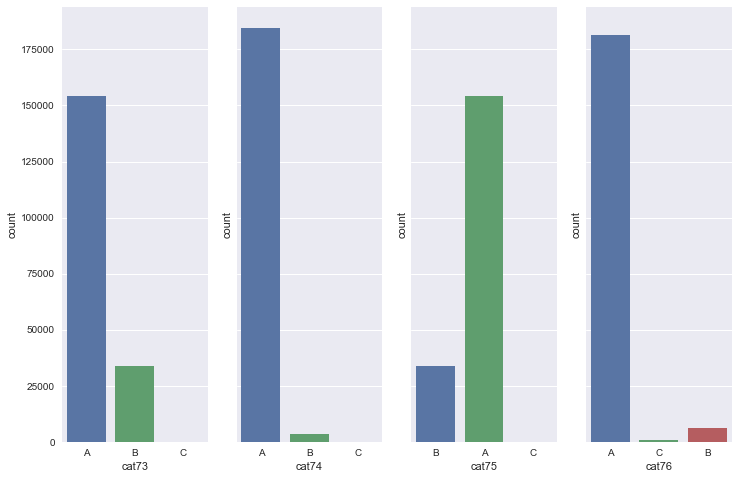

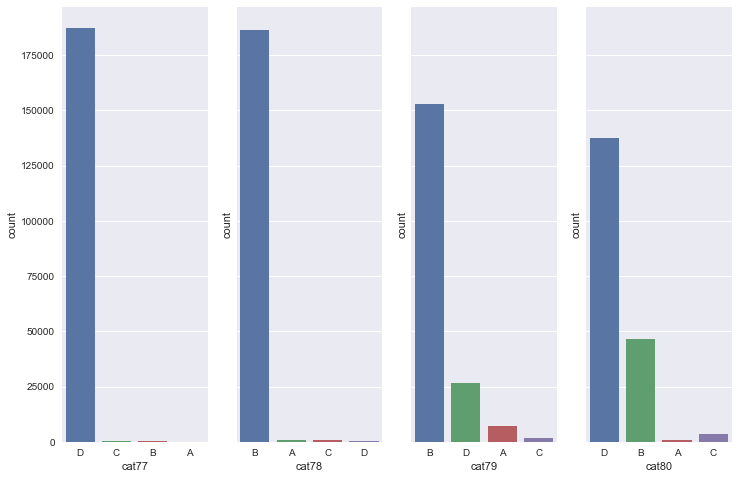

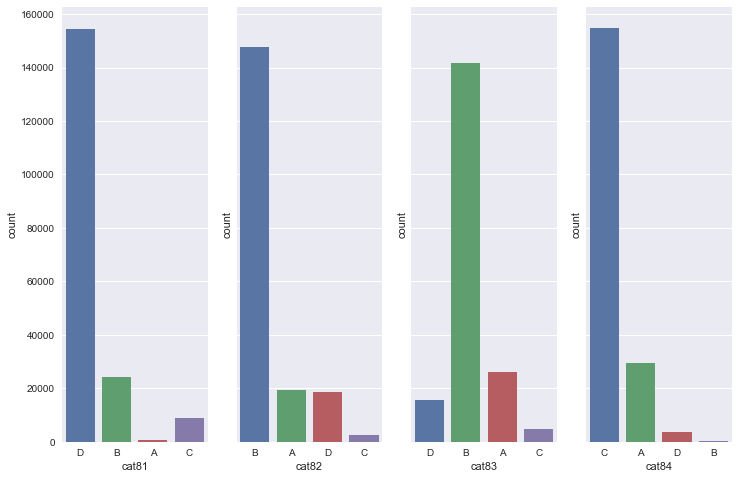

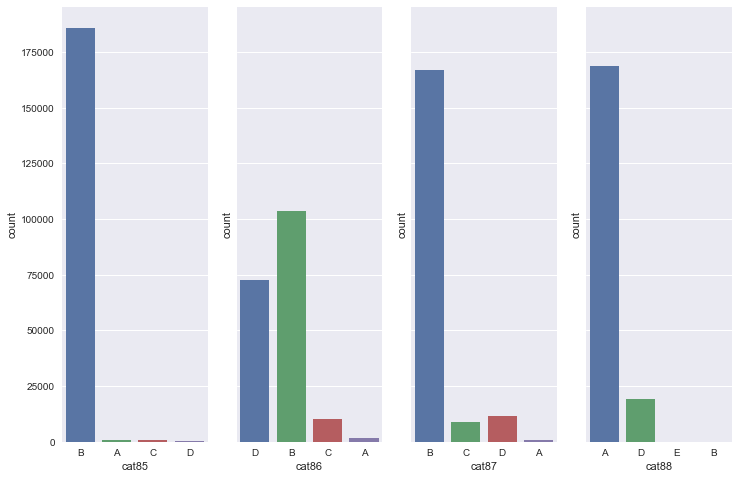

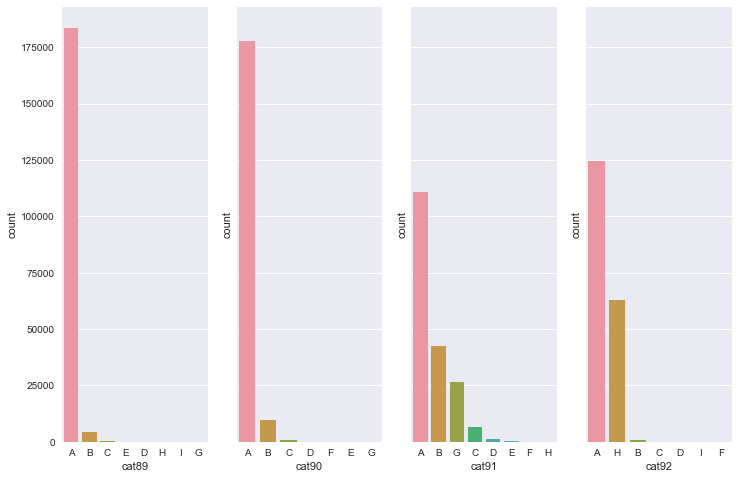

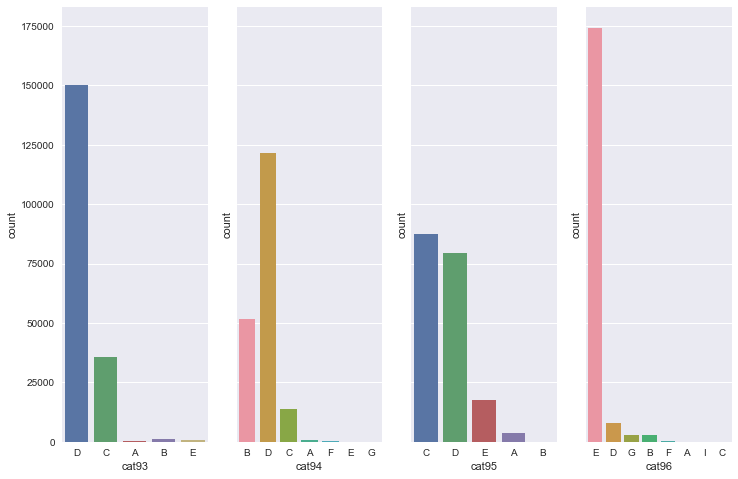

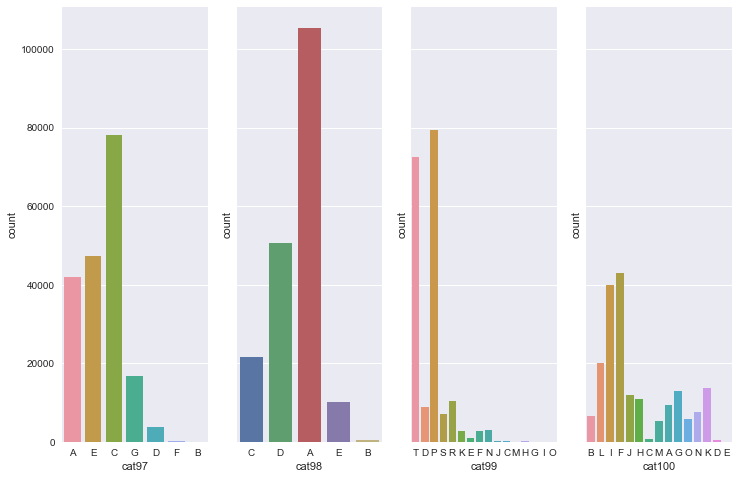

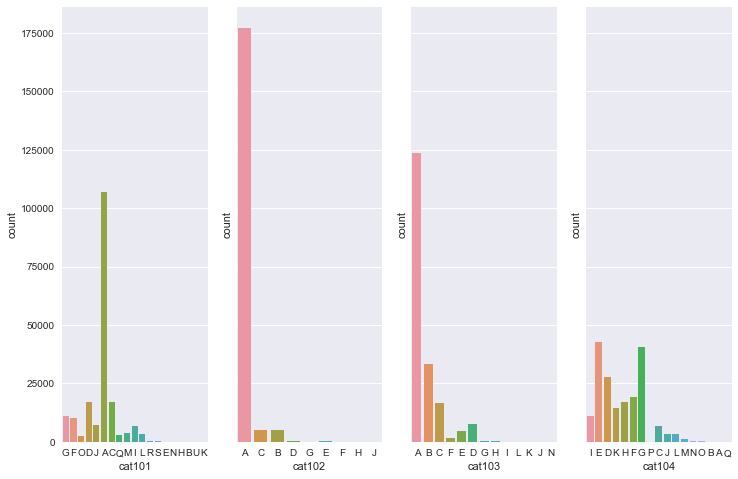

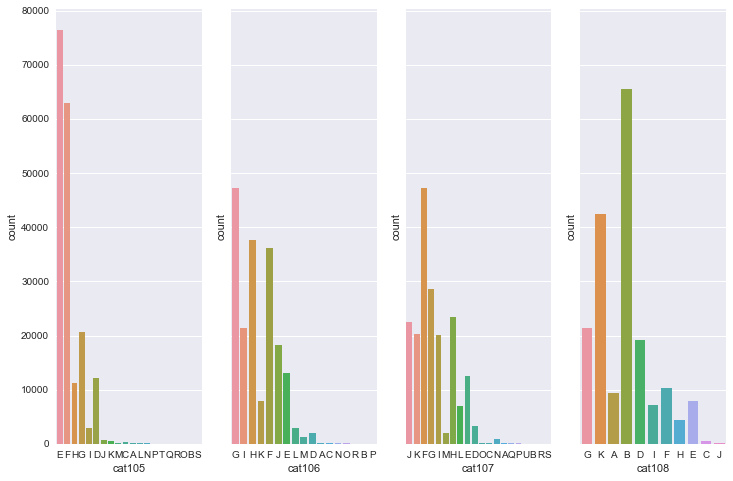

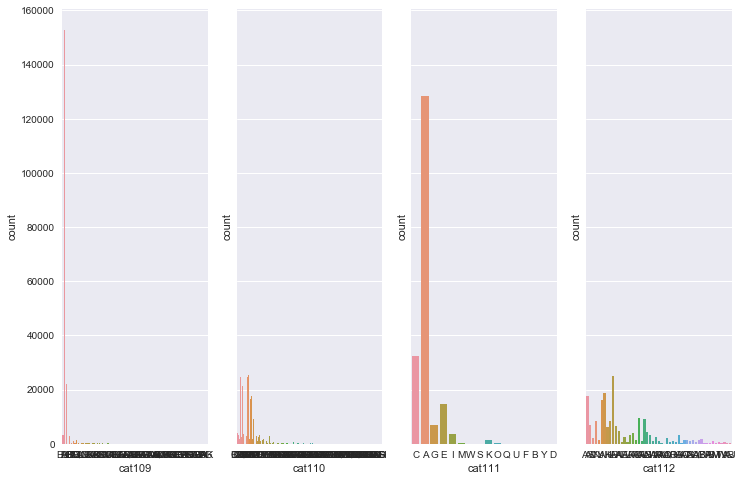

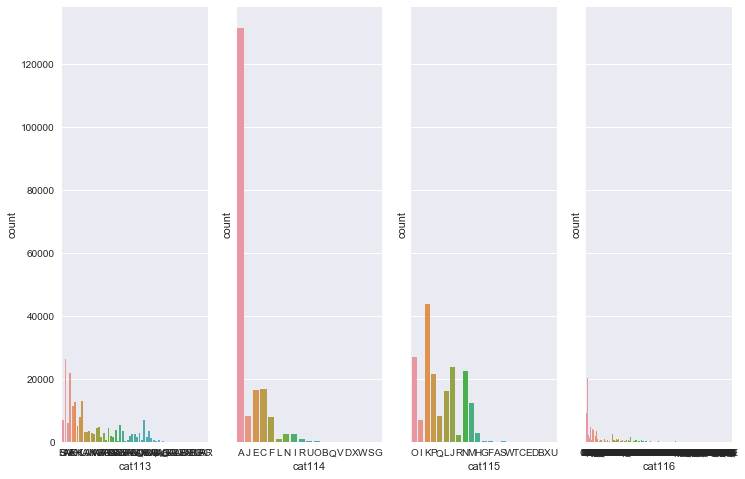

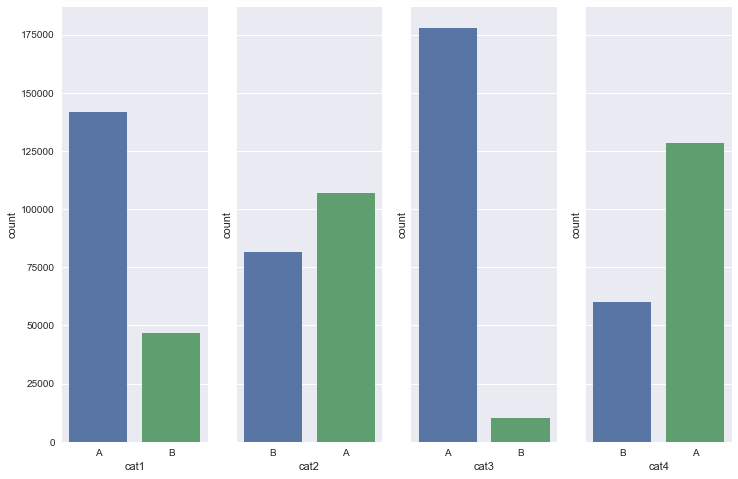

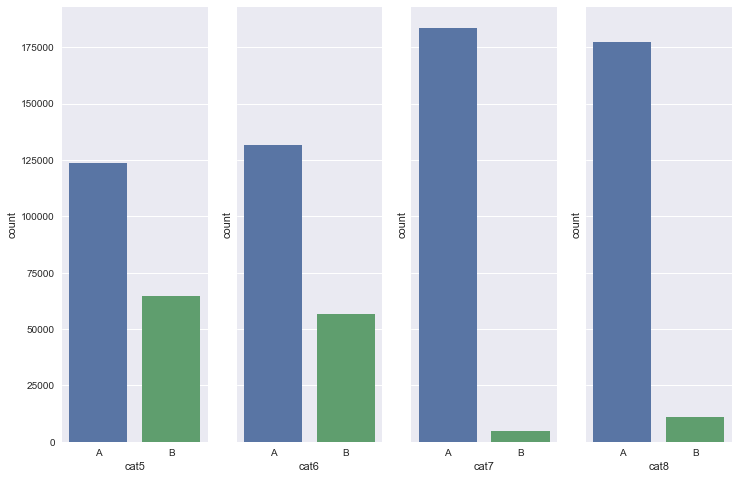

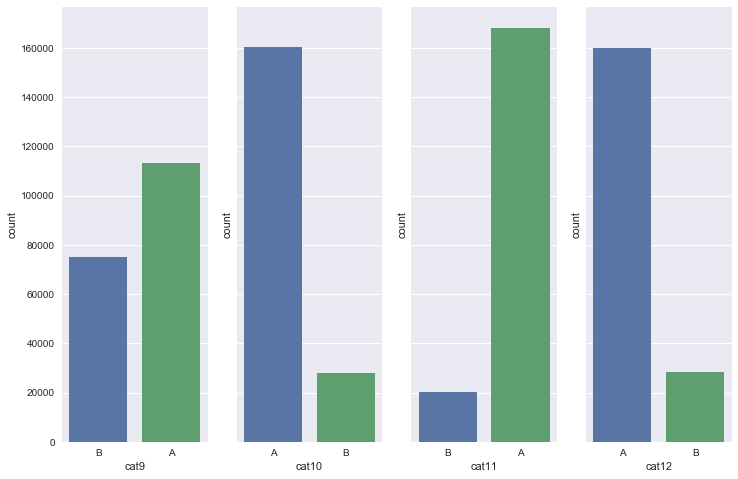

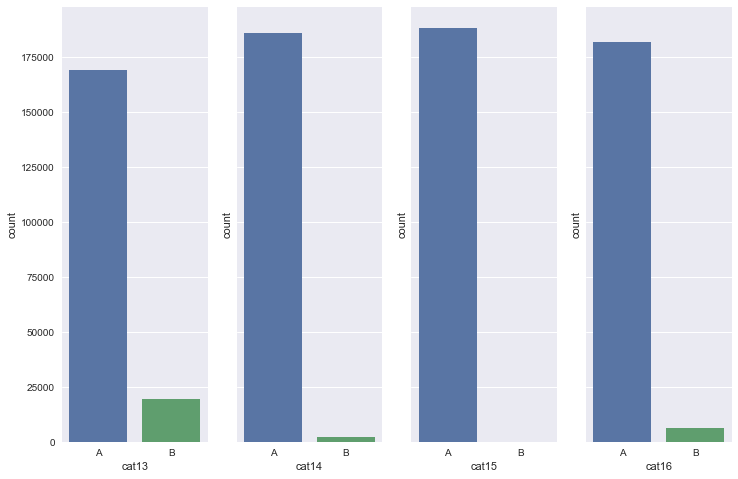

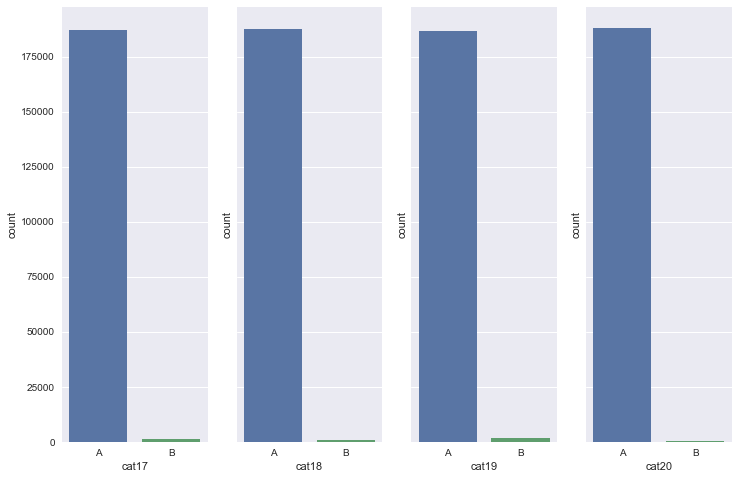

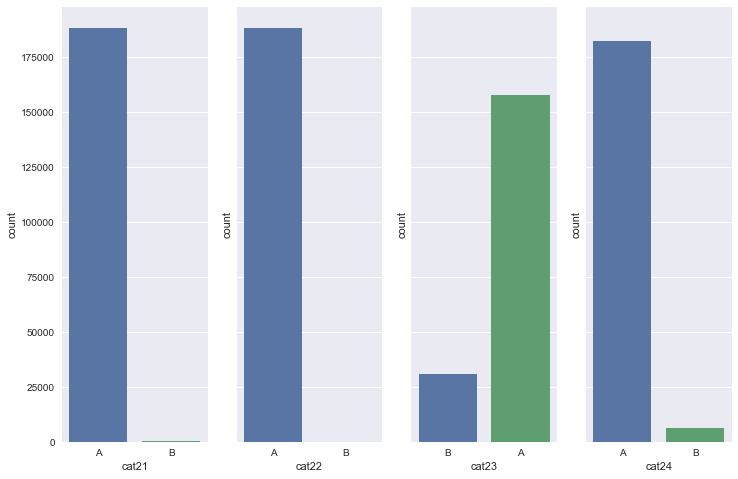

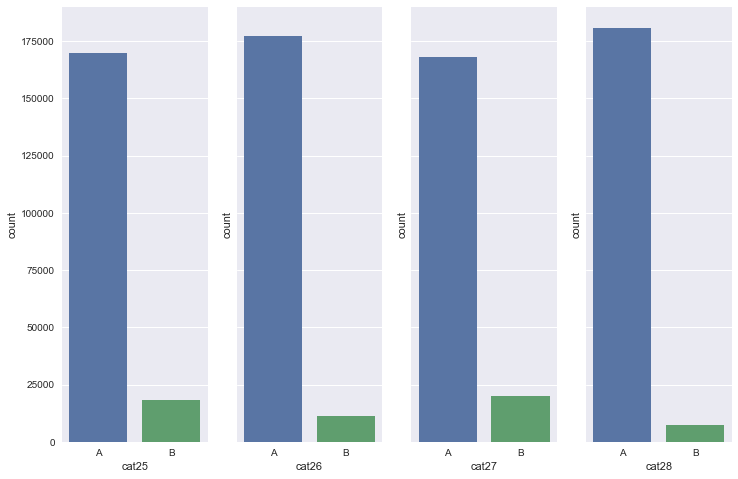

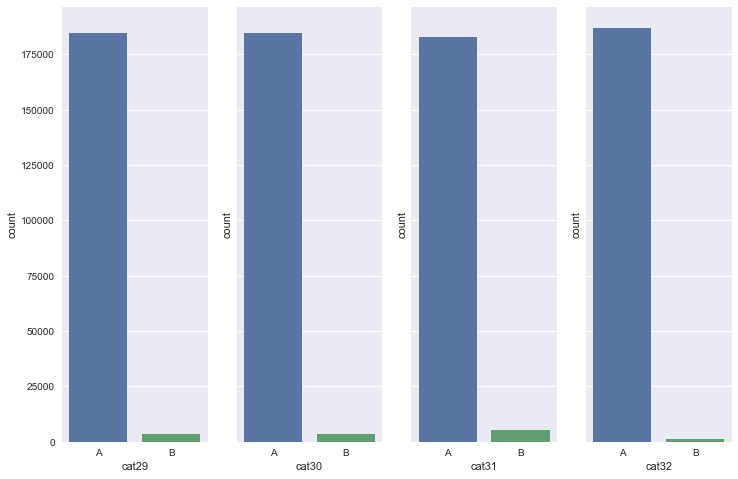

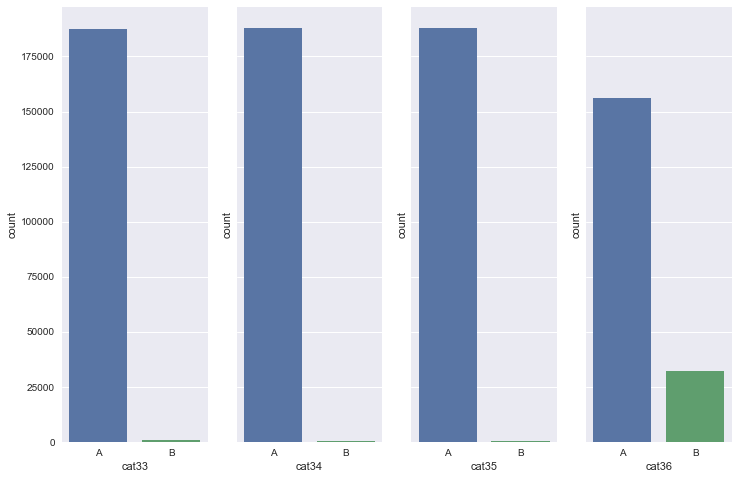

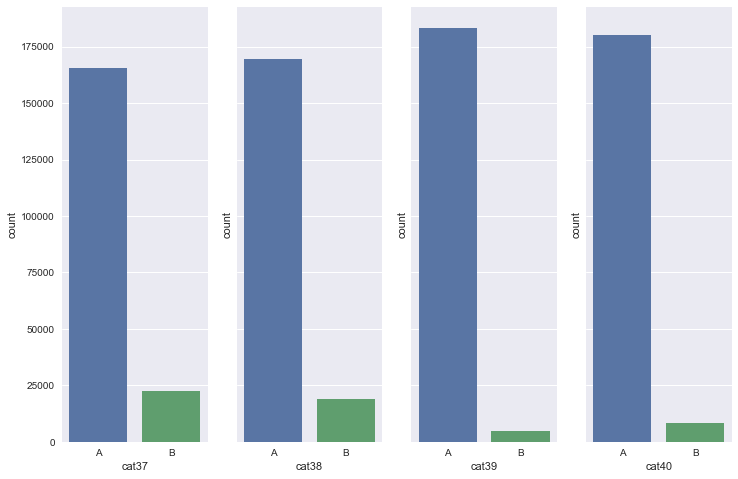

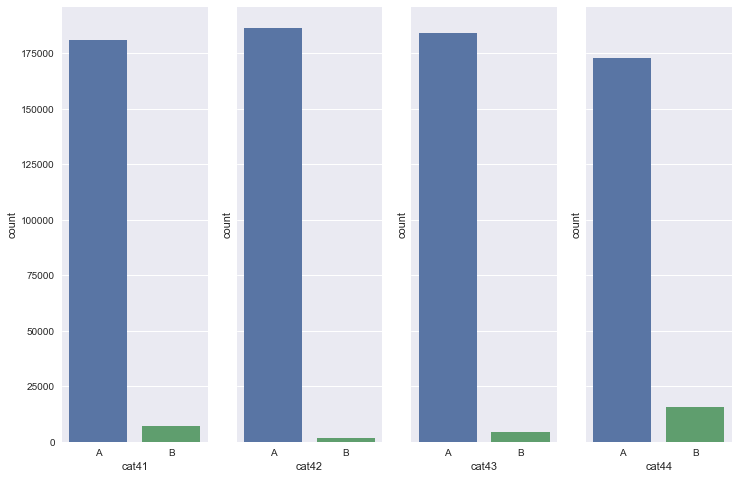

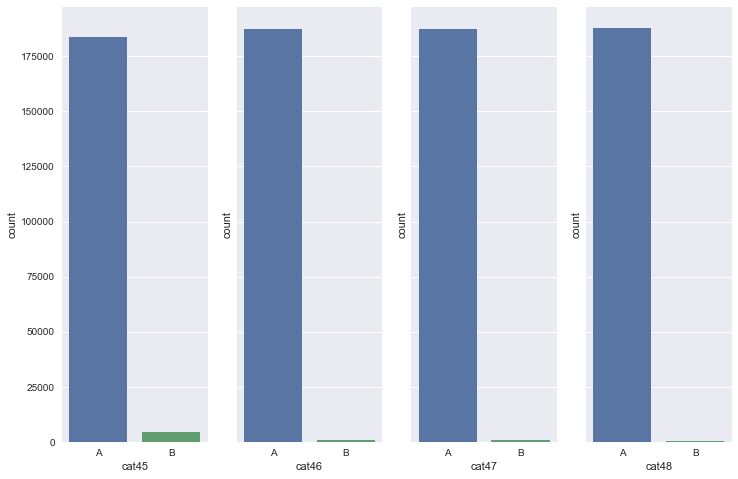

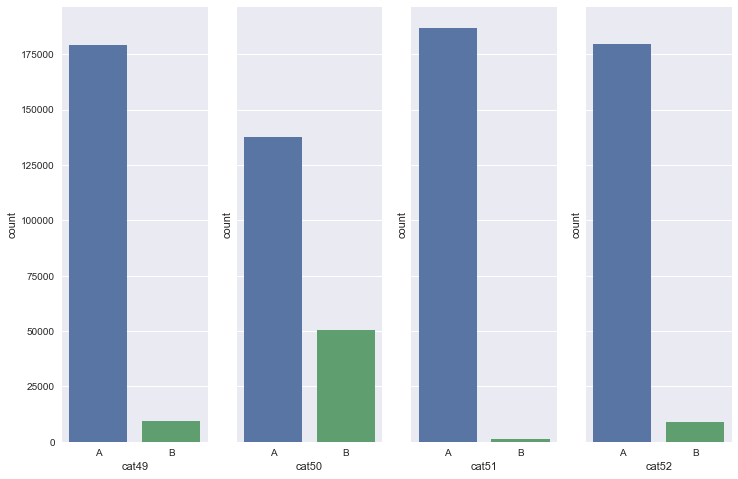

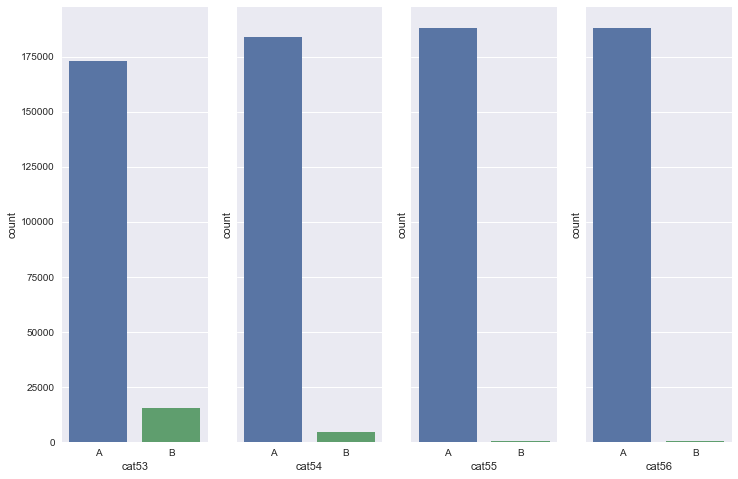

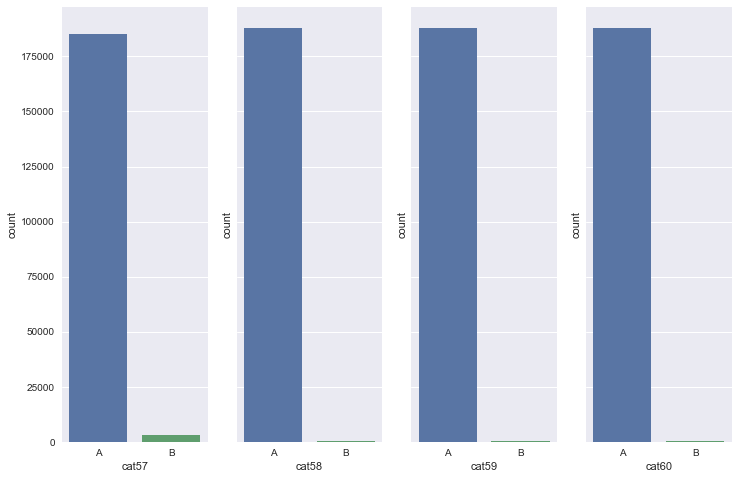

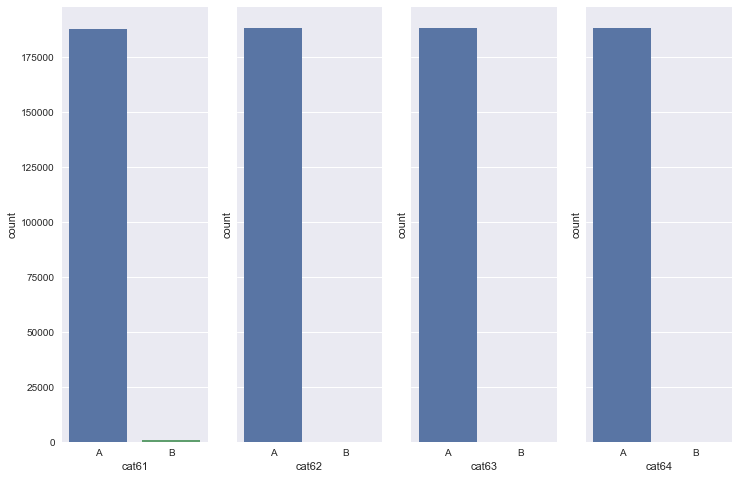

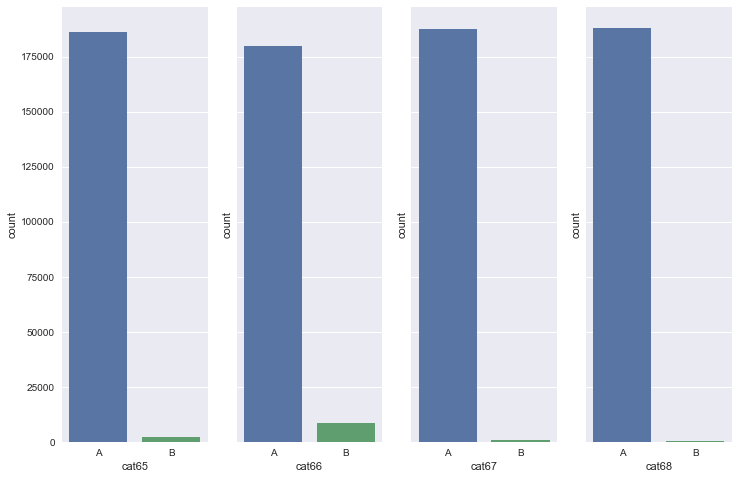

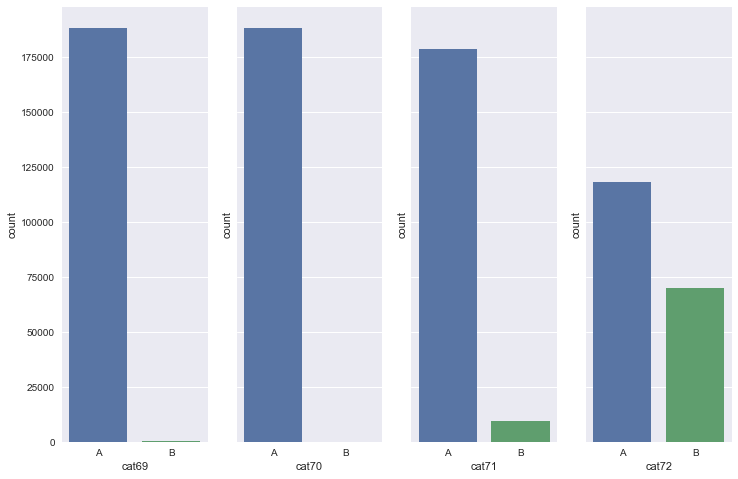

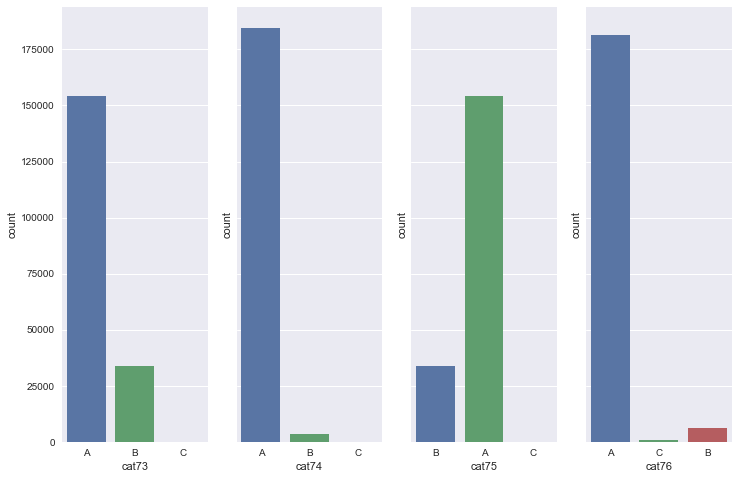

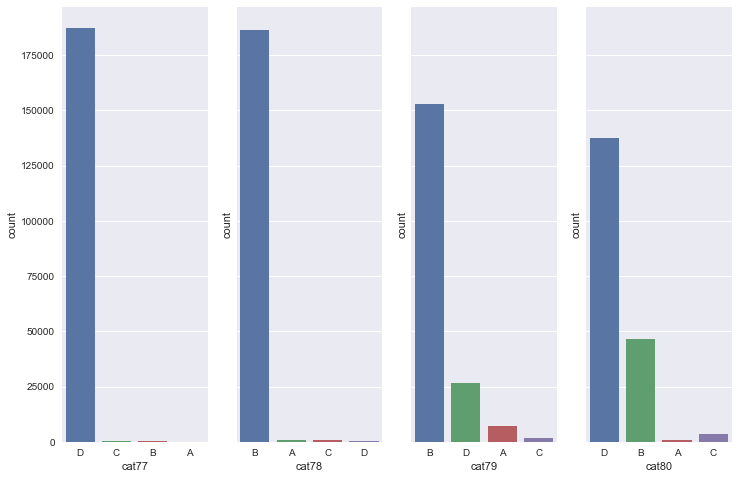

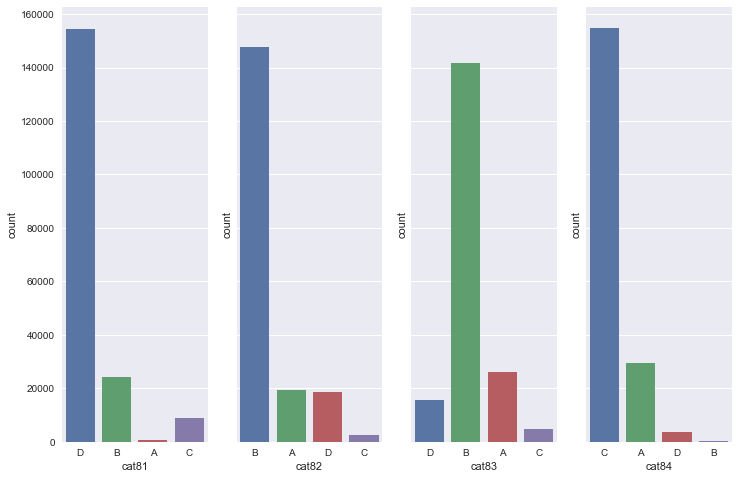

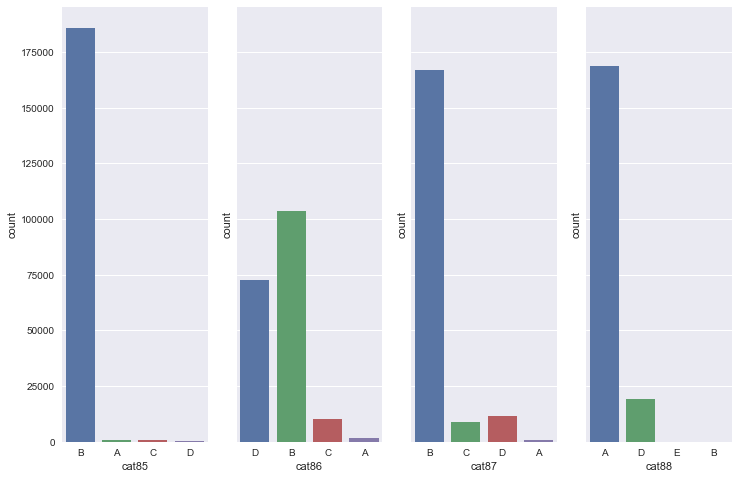

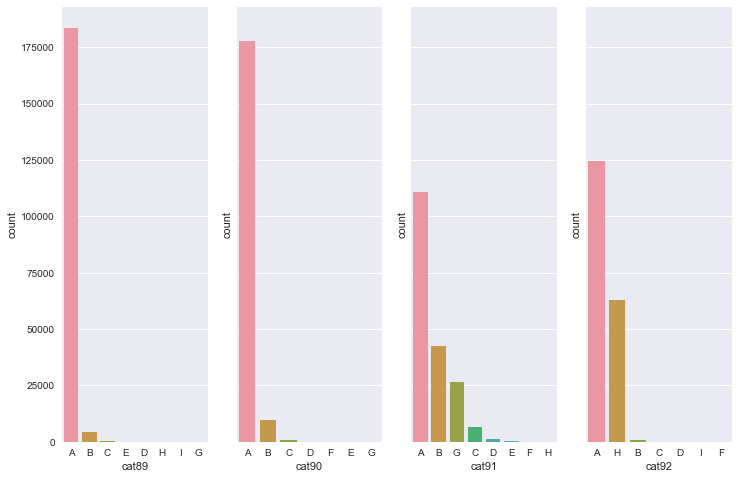

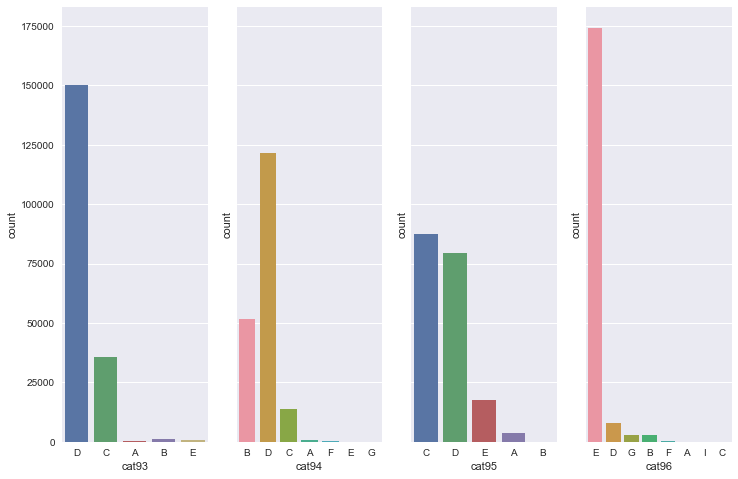

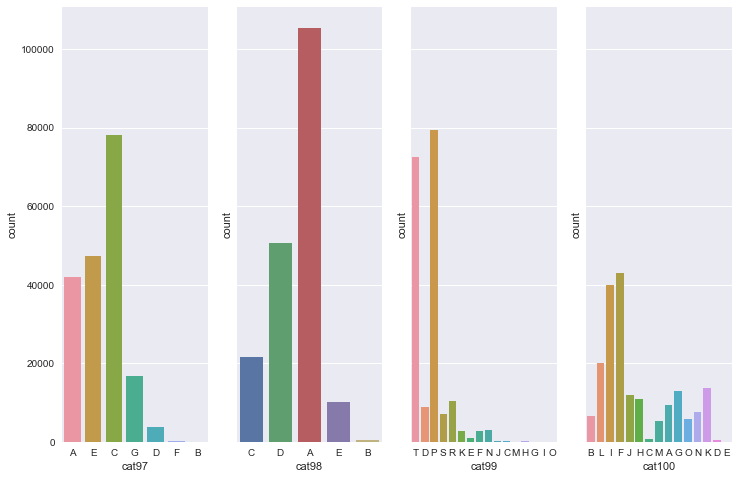

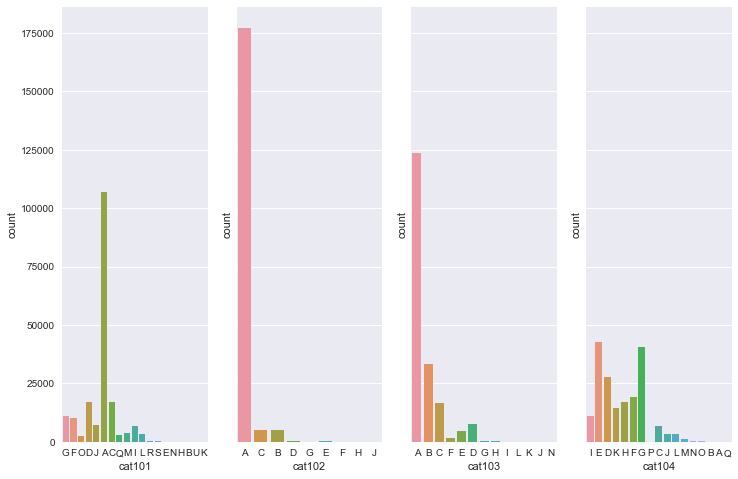

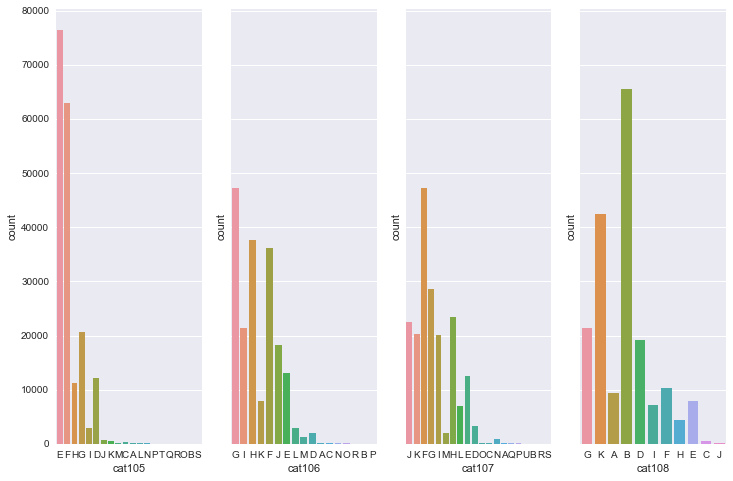

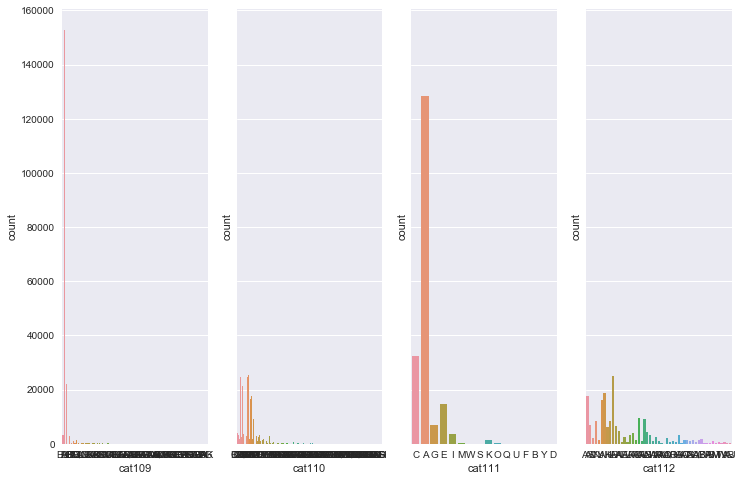

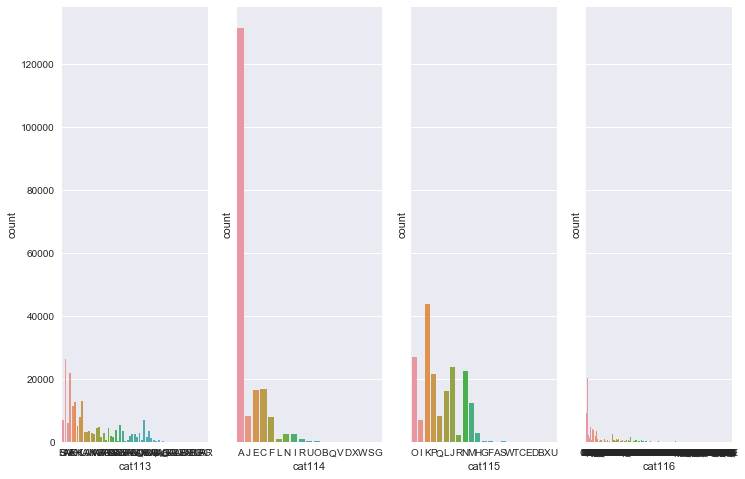

In [155]:
n_cols=4;n_rows=29

for i in range(n_rows):
    fg,ax=plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12,8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j],data=train,ax=ax[j])
plt.show()       


In [163]:
labels=[]
for i in range(split):
    train_=train[cols[i]].unique()
    test_=test[cols[i]].unique()
    labels.append(list(set(train_)|set(test_)))

labels



[['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'A'],
 ['B', 'C', 'A'],
 ['B', 'C', 'A'],
 ['B', 'C', 'A'],
 ['B', 'C'

In [165]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [178]:
cats=[]
for i in range(split):
    label_encoder=LabelEncoder()
    label_encoder.fit(labels[i])
    feature=label_encoder.transform(train.iloc[:,i])
    feature=feature.reshape(train.shape[0],1)
    
    
    onehot_encoder=OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature=onehot_encoder.fit_transform(feature)
    cats.append(feature)
    
    
encoded_cats=np.column_stack(cats)

print(encoded_cats.shape)
    

train_encoded=np.concatenate((encoded_cats,train.iloc[:,split:].values),axis=1)
print(train_encoded.shape)

(188318, 1176)
(188318, 1191)


In [179]:
#Data Preparation

# Get the number of rows and column
r,c=train_encoded.shape

#create an array which has indexes of columns

i_cols=[]
for i in range(c-1):
    i_cols.append(i)
    
#Y is the target column, X has the rest
x=train_encoded[:,0:(c-1)]
y=train_encoded[:,(c-1)]

#validation Chunk size
val_size=.1

#use a common seed in all experiment so that same chunk is used for validation
seed=0


#split the data into chunks
from sklearn import cross_validation

x_train,x_val,y_train,y_val=cross_validation.train_test_split(x,y,test_size=val_size,random_state=seed)


#All features
x_all=[]

#List of combination
comb=[]

#Dictionary to store the MAE for all algorithms

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,